In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [226]:
#Downloading the dataset
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [227]:
data = pd.read_csv('dataset.csv')

In [228]:
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [229]:
data.describe(include="all")

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
count,346.000000,346.000000,346,346.000000,346.000000,346,346,346.000000,346,346
unique,NaN,NaN,2,NaN,NaN,7,23,NaN,4,2
top,NaN,NaN,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,NaN,High School or Below,male
freq,NaN,NaN,260,NaN,NaN,166,90,NaN,151,294
mean,202.167630,202.167630,NaN,943.641618,22.653179,NaN,NaN,30.939306,NaN,NaN
std,115.459715,115.459715,NaN,109.425530,7.991006,NaN,NaN,6.039418,NaN,NaN
min,0.000000,0.000000,NaN,300.000000,7.000000,NaN,NaN,18.000000,NaN,NaN
25%,107.250000,107.250000,NaN,900.000000,15.000000,NaN,NaN,27.000000,NaN,NaN
50%,204.500000,204.500000,NaN,1000.000000,30.000000,NaN,NaN,30.000000,NaN,NaN
75%,298.750000,298.750000,NaN,1000.000000,30.000000,NaN,NaN,35.000000,NaN,NaN


In [230]:
data.isna().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [231]:
loan_status = data['loan_status'].value_counts()

Text(0, 0.5, 'Count')

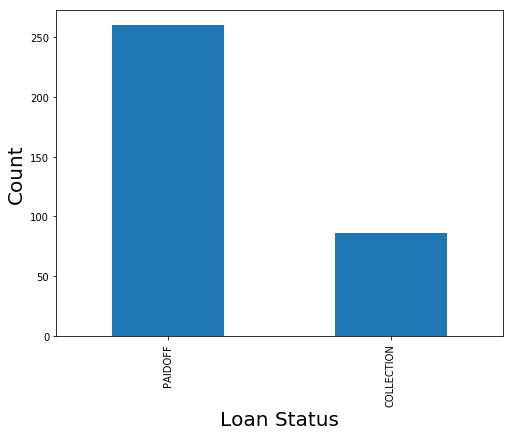

In [232]:
plt.figure(figsize=(8,6))
loan_status.plot.bar()
plt.xlabel("Loan Status", fontsize=20)
plt.ylabel("Count", fontsize=20)

In [233]:
data[['loan_status','Gender']].groupby(['Gender'], as_index=False).count()

,Gender,loan_status
0,female,52
1,male,294


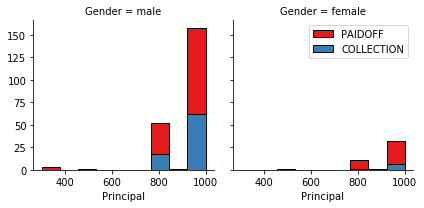

In [234]:
bins = np.linspace(data.Principal.min(), data.Principal.max(), 10)
g = sns.FacetGrid(data, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [235]:
data['due_date'] = pd.to_datetime(data['due_date'])
data['effective_date'] = pd.to_datetime(data['effective_date'])

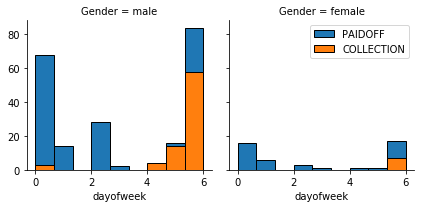

In [236]:
data['dayofweek'] = data['effective_date'].dt.dayofweek
bins = np.linspace(data.dayofweek.min(), data.dayofweek.max(), 10)
g = sns.FacetGrid(data, col="Gender", hue="loan_status", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [237]:
pd.get_dummies(data['education'])

,Bechalor,High School or Below,Master or Above,college
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1
6,0,0,0,1
7,0,0,0,1
8,0,0,0,1
9,0,1,0,0


In [238]:
clean_data = data

In [239]:
clean_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4
5,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male,4
6,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male,4
7,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male,5
8,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male,5
9,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male,5


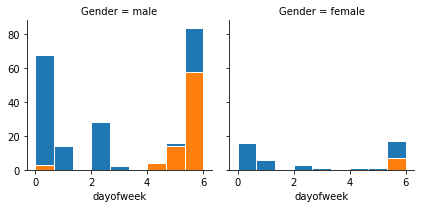

In [240]:
data['dayofweek'] = data['effective_date'].dt.dayofweek
bins = np.linspace(data['dayofweek'].min(), data['dayofweek'].max(), 10)
g = sns.FacetGrid(data, col='Gender', hue='loan_status', col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="w")
plt.show()

In [241]:
clean_data['weekend'] = clean_data['dayofweek'].apply(lambda x:1 if (x>3) else 0)

In [242]:
clean_data_features = clean_data[['loan_status', 'Principal', 'terms', 'age', 'education', 'Gender', 'dayofweek', 'weekend']]

In [243]:
gender_loan_status = clean_data_features.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

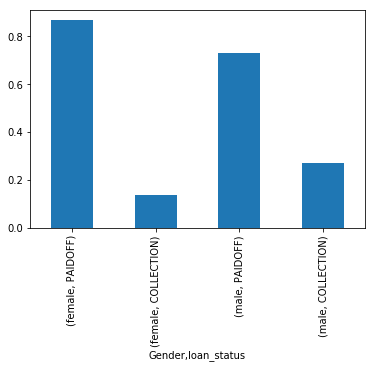

In [244]:
#Bar Representation
gender_loan_status.plot.bar()

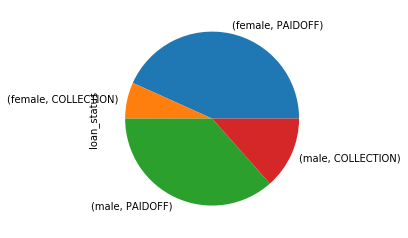

In [245]:
#Pir Chart Representation
gender_loan_status.plot.pie()

In [246]:
clean_data_features['Gender'].replace(to_replace=['male', 'female'], value=[0,1], inplace=True)

C:\Users\aaa\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [274]:
X = clean_data_features.drop(['loan_status'], axis=1)

In [275]:
y = clean_data_features['loan_status']

In [276]:
X.drop(['dayofweek'], axis=1, inplace=True)
X.head()

,Principal,terms,age,education,Gender,weekend
0,1000,30,45,High School or Below,0,0
1,1000,30,33,Bechalor,1,0
2,1000,15,27,college,0,0
3,1000,30,28,college,1,1
4,1000,30,29,college,0,1


In [277]:
X.drop(['education'], axis=1, inplace=True)
X.head()

,Principal,terms,age,Gender,weekend
0,1000,30,45,0,0
1,1000,30,33,1,0
2,1000,15,27,0,0
3,1000,30,28,1,1
4,1000,30,29,0,1


In [278]:
one_hot_encode_education = pd.get_dummies(data['education'])

In [279]:
one_hot_encode_education.drop(['Master or Above'], axis=1, inplace=True)

In [280]:
one_hot_encode_education.head()

,Bechalor,High School or Below,college
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [281]:
X = pd.concat([X, one_hot_encode_education], axis=1)

In [282]:
X.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [283]:
y.head()

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

In [284]:
sc = StandardScaler()

In [285]:

X = sc.fit_transform(X)

C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [286]:
X

array([[ 0.51578458,  0.92071769,  2.33152555, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ...,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.38170062,
        -0.87997669,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
        -0.87997669,  1.14984679]])

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [289]:
from sklearn.neighbors import KNeighborsClassifier

In [290]:
knn_train_scores = []
knn_test_scores = []
best_k = 0
for i in range(1, 100):
    knn_model = KNeighborsClassifier(n_neighbors = i, weights='uniform')
    knn_model.fit(X_train, y_train)
    y_pred_train = knn_model.score(X_train, y_train)
    y_pred_test = knn_model.score(X_test, y_test)
    knn_train_scores.append(y_pred_train)
    knn_test_scores.append(y_pred_test)

In [291]:
print("Maximum Training Accuracy: ",max(knn_train_scores))
print("Value of K: ", knn_train_scores.index(max(knn_train_scores))+1)
print("--------------------------------------------------------------")
best_k = knn_test_scores.index(max(knn_test_scores))+1
print("Maximum Testing Accuracy: ",max(knn_test_scores))
print("Value of K: ", knn_test_scores.index(max(knn_test_scores))+1)

Maximum Training Accuracy:  0.9227053140096618
Value of K:  1
--------------------------------------------------------------
Maximum Testing Accuracy:  0.7338129496402878
Value of K:  25


Text(0, 0.5, 'Test Accuracy')

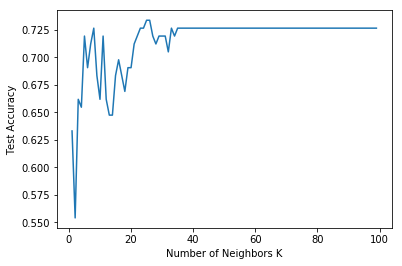

In [292]:
plt.plot(range(1,100),knn_test_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')

In [293]:
import sklearn.metrics as metrics
final_knn_model = KNeighborsClassifier(best_k, weights='uniform')
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
score = knn_model.score(X_test, y_test)
print("Score / Accuracy :", score)
print("With best value of K: ", best_k)

Score / Accuracy : 0.7266187050359713
With best value of K:  25


In [299]:
from sklearn.metrics import classification_report,jaccard_similarity_score,log_loss,f1_score
print(classification_report(y_test, y_pred, target_names=['COLLECTION', 'PAIDOFF']))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,y_pred)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test, y_pred,average=None))
print('\n')

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        38
     PAIDOFF       0.73      1.00      0.84       101

   micro avg       0.73      0.73      0.73       139
   macro avg       0.36      0.50      0.42       139
weighted avg       0.53      0.73      0.61       139



Jaccard Similarity Score :  72.66 %


F1-SCORE :  [0.         0.84166667]




C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [295]:
from sklearn.tree import DecisionTreeClassifier

In [296]:
decision_tree_model = DecisionTreeClassifier(criterion='gini')
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [297]:
y_pred = knn_model.predict(X_test)
score = knn_model.score(X_test, y_test)

In [298]:
from sklearn.metrics import classification_report,jaccard_similarity_score,log_loss,f1_score
print(classification_report(y_test,y_pred))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,y_pred)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test, y_pred,average=None))
print('\n')

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        38
     PAIDOFF       0.73      1.00      0.84       101

   micro avg       0.73      0.73      0.73       139
   macro avg       0.36      0.50      0.42       139
weighted avg       0.53      0.73      0.61       139



Jaccard Similarity Score :  72.66 %


F1-SCORE :  [0.         0.84166667]




C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [272]:
print(classification_report(y_test,y_pred))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,y_pred)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test, y_pred,average=None))
print('\n')

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        29
     PAIDOFF       0.72      1.00      0.84        75

   micro avg       0.72      0.72      0.72       104
   macro avg       0.36      0.50      0.42       104
weighted avg       0.52      0.72      0.60       104



Jaccard Similarity Score :  72.12 %


F1-SCORE :  [0.         0.83798883]




C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [273]:
from sklearn.svm import SVC

In [221]:
support_vector_model = SVC(C=1.0, kernel='rbf', degree=4)

In [222]:
support_vector_model.fit(X_train, y_train)

C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [223]:
y_pred = support_vector_model.score(X_test, y_test)

0.7307692307692307

In [224]:
print(classification_report(y_test,y_pred))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,y_pred)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test, y_pred,average=None))
print('\n')

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        28
     PAIDOFF       0.73      1.00      0.84        76

   micro avg       0.73      0.73      0.73       104
   macro avg       0.37      0.50      0.42       104
weighted avg       0.53      0.73      0.62       104



Jaccard Similarity Score :  73.08 %


F1-SCORE :  [0.         0.84444444]




C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [181]:
from sklearn.linear_model import LogisticRegression

In [182]:
logistic_model = LogisticRegression()

In [183]:
logistic_model.fit(X_train, y_train)

C:\Users\aaa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [184]:
logistic_model.score(X_test, y_test)

0.7788461538461539

In [51]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [52]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [53]:
y_test_loan = test_df['loan_status']
X_test_loan = test_

In [54]:
from sklearn.metrics import f1_score
y_pred_knn = knn_model.predict()
f1_score(y_test,preds)

0        PAIDOFF
1        PAIDOFF
2        PAIDOFF
3        PAIDOFF
4        PAIDOFF
5        PAIDOFF
6        PAIDOFF
7        PAIDOFF
8        PAIDOFF
9        PAIDOFF
10       PAIDOFF
11       PAIDOFF
12       PAIDOFF
13       PAIDOFF
14       PAIDOFF
15       PAIDOFF
16       PAIDOFF
17       PAIDOFF
18       PAIDOFF
19       PAIDOFF
20       PAIDOFF
21       PAIDOFF
22       PAIDOFF
23       PAIDOFF
24       PAIDOFF
25       PAIDOFF
26       PAIDOFF
27       PAIDOFF
28       PAIDOFF
29       PAIDOFF
30       PAIDOFF
31       PAIDOFF
32       PAIDOFF
33       PAIDOFF
34       PAIDOFF
35       PAIDOFF
36       PAIDOFF
37       PAIDOFF
38       PAIDOFF
39       PAIDOFF
40    COLLECTION
41    COLLECTION
42    COLLECTION
43    COLLECTION
44    COLLECTION
45    COLLECTION
46    COLLECTION
47    COLLECTION
48    COLLECTION
49    COLLECTION
50    COLLECTION
51    COLLECTION
52    COLLECTION
53    COLLECTION
Name: loan_status, dtype: object